 Author: Jenea Spinks

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Chocolate Bar rating dataset

We used a publicly available dataset: http://flavorsofcacao.com/chocolate_database.html

This dataset contains over 2500 ratings about the plain dark chocolate bar within each company during different review dates. The column Ingredients is of the form "#- list of ingredients". The "#" = represents the number of ingredients in the chocolate; B = Beans, S = Sugar, S* = Sweetener other than white cane or beet sugar, C = Cocoa Butter, V = Vanilla, L = Lecithin, Sa = Salt. The most Memorable Characteristics column is a summary of the most memorable characteristics of that bar. The terms contained within this column generally relate to anything from texture, flavor, overall opinion, etc.

In [2]:
chocolate = pd.read_csv('data/chocolate.csv')
chocolate.head(5)

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,1205,Habitual,Canada,2014,Blend,one hundred,100%,NaN,"unrefined, bitter, earthy",2.00
1,701,Haigh,Australia,2011,Blend,South America and Africa,70%,NaN,"vanilla, chocolate milk",3.00
2,1113,Hotel Chocolat,U.K.,2013,St. Lucia,"Island Growers, 2012, 120hr c., batch 13080",100%,NaN,"pastey, bitter, unfixable",1.75
3,296,Hotel Chocolat (Coppeneur),U.K.,2008,Uganda,Uganda,80%,NaN,"charred, espresso",2.50
4,552,Hotel Chocolat (Coppeneur),U.K.,2010,Ecuador,Ecuador,70%,NaN,"spicy, sour, burning",2.75


## Company Locations with the highest and lowest average ratings

In this section, we will analyze the company locations with the highest and lowest average rating. By finding this company location, we can slice into the entire chocolate bar dataset to see if there are any characterics/features that cause this highest average rating. 

In this section, we will obtain the columns of Company Locaton and Rating to form a new dataset for our analysis and use this dataset to group by the Company location using the mean of all ratings for the location

In [3]:
company_rating = chocolate[['Company Location','Rating']]
company_rating

,Company Location,Rating
0,Canada,2.00
1,Australia,3.00
2,U.K.,1.75
3,U.K.,2.50
4,U.K.,2.75
...,...,...
1555,France,2.75
1556,France,3.00
1557,France,3.00
1558,France,3.00


In [4]:
rating_grouped = company_rating.groupby('Company Location').mean().reset_index()
rating_grouped

,Company Location,Rating
0,Amsterdam,3.218750
1,Argentina,3.150000
2,Australia,3.433824
3,Austria,3.192308
4,Belgium,3.086538
5,Brazil,3.194444
6,Canada,3.357877
7,Chile,3.750000
8,Colombia,2.500000
9,Costa Rica,3.093750


In [5]:
#saving dataset to tables folder
rating_grouped.to_csv('tables/Company_Location_Average_Rating.csv')

Then, we will create a scatter plot for the mean ratings of each company locations to visualize any outliers rating that can be further analyzed.

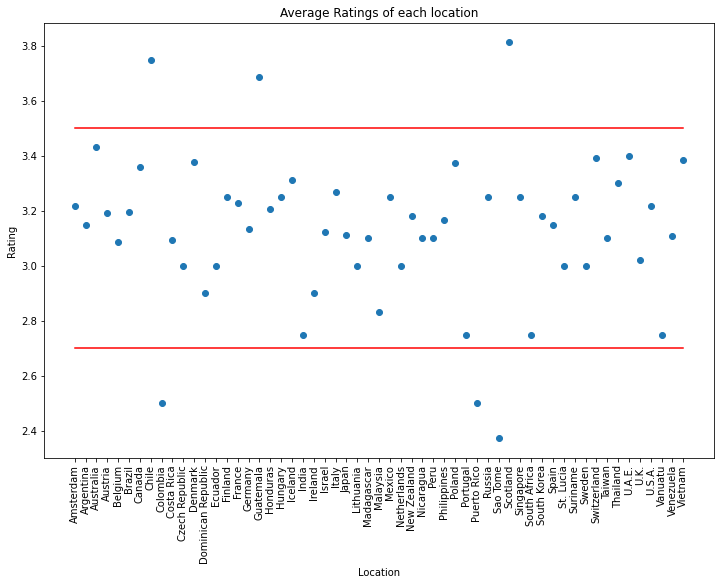

In [6]:
rating = rating_grouped['Rating']
company_location = rating_grouped['Company Location']
plt.figure(figsize = (12,8))
plt.scatter(company_location, rating)
plt.plot(company_location, np.ones(len(rating))*2.7, color = 'r')
plt.plot(company_location, np.ones(len(rating))*3.5, color = 'r')
plt.xticks(rotation= 90 )
plt.title('Average Ratings of each location')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.savefig('figures/CompanyLocation_MeanRating.jpg', bbox_inches='tight', dpi = 50)

In the next two cells, we obtain the sixe outliers locations shown in the graph below ad print them out.

In [7]:
min_locations = rating_grouped.sort_values('Rating', ascending = True)['Company Location'].values[0:3]
max_locations = rating_grouped.sort_values('Rating', ascending = False)['Company Location'].values[0:3]

In [8]:
print('The locations with the lowest average ratings are', min_locations)
print('The locations with the highest average ratings are', max_locations)

The locations with the lowest average ratings are ['Sao Tome' 'Puerto Rico' 'Colombia']
The locations with the highest average ratings are ['Scotland' 'Chile' 'Guatemala']


## Company Locations with highest Overall Rating and lowest overall rating

We obtain the company location wth the highest and lowest overall rating and showing these two datasets below.

In [9]:
max_rating = max(rating_grouped['Rating'])
max_rated_company = rating_grouped[rating_grouped['Rating'] == max_rating]
max_rated_company

,Company Location,Rating
40,Scotland,3.8125


In [10]:
min_rating = min(rating_grouped['Rating'])
min_rated_company = rating_grouped[rating_grouped['Rating'] == min_rating]
min_rated_company

,Company Location,Rating
39,Sao Tome,2.375


## Displaying highest and lowest rated locations and their ingredients used

Next, we will slice into the chocolate data to only have the three maximum rating locations and the three minimum rating locations to observe any key ingredients that caused these six company locations to have the highest and lowest average ratings.

In [21]:
#selecting rows that contains the company locations with lowest ratings
bools_min = [chocolate['Company Location'][i] in min_locations for i in np.arange(len(chocolate))]
min_companies = chocolate[bools_min][['Company Location','Ingredients']]
min_companies

,Company Location,Ingredients
26,Colombia,NaN
73,Sao Tome,NaN
560,Puerto Rico,"2- B,S"
643,Sao Tome,"2- B,S"


In [22]:
#selecting rows that contains the company locations with highest ratings
bools_max = [chocolate['Company Location'][i] in max_locations for i in np.arange(len(chocolate))] 
max_companies = chocolate[bools_max][['Company Location','Ingredients']]
max_companies

,Company Location,Ingredients
290,Chile,"2- B,S"
291,Chile,"2- B,S"
627,Scotland,"2- B,S"
628,Scotland,"2- B,S"
684,Guatemala,"2- B,S"
685,Guatemala,"2- B,S"
686,Guatemala,"2- B,S"
687,Guatemala,"2- B,S"
1164,Scotland,"3- B,S,C"
1165,Scotland,"3- B,S,C"


Save dataframes above to tables folder

In [13]:
max_companies.to_csv('tables/Three_companies_with_highest_average rating.csv', index= False)
min_companies.to_csv('tables/Three_companies_with_lowest_average rating.csv', index = False)

## Ingredients with best average rating

Using these two datasets containing the six countries, we will analyze how ingredients affects these ratings of chocolates and how this relationship links to the top three and bottom three rated locations.

First we will drop the rows with missing values as this could affest our analysis. Then we will group by each ingredients using the mean rating for each.

In [14]:
#drop Nan values and obtain relevant columns
ingredients = chocolate.dropna(subset = ['Ingredients'])[['Ingredients','Rating']]
ingredients_grouped = ingredients.groupby('Ingredients').mean().reset_index()
ingredients_grouped

,Ingredients,Rating
0,1- B,2.958333
1,"2- B,C",3.000000
2,"2- B,S",3.229457
3,"2- B,S*",2.959677
4,"3- B,S*,C",2.937500
5,"3- B,S*,Sa",2.500000
6,"3- B,S,C",3.280540


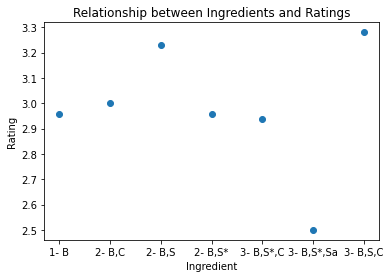

In [15]:
x = ingredients_grouped['Ingredients']
y = ingredients_grouped['Rating']
plt.scatter(x,y)
plt.title('Relationship between Ingredients and Ratings')
plt.ylabel('Rating')
plt.xlabel('Ingredient')
plt.savefig('figures/Ingredients_MeanRatings.jpg')

## Analyzing how the ratings have changed over time

In this section, we will build upon our analysis of ingredients and rating by analyzing the avergae rating for each year and the main ingredients used within that review year

First we will obtain each unique year in the dataset and calculate the average rating for the year and the main ingredients used in companies within that year

In [16]:
years = np.sort(chocolate['Review Date'].unique())
years

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021])

In [19]:
ratings = []
ingredients = []
for year in years:
    #obtaining the average rating for each year
    subset = chocolate[chocolate['Review Date'] == year]
    avg_rating = np.mean(subset['Rating'])
    ratings.append(avg_rating)
    
    #obtaining ingredients used the most for each year
    main_ingre = subset.groupby('Ingredients').count().reset_index()
    main_sorted = main_ingre.sort_values(by ='Review Date')['Ingredients'][0]
    ingredients.append(main_sorted)

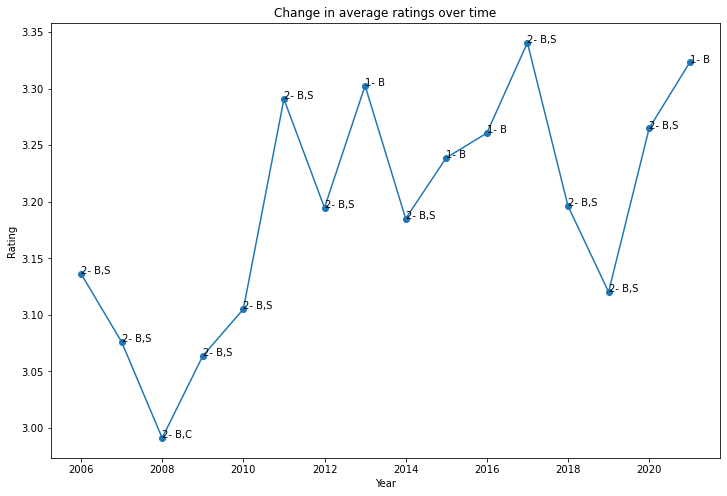

In [20]:
plt.figure(figsize = (12,8))
plt.scatter(years, ratings)
plt.plot(years, ratings)
for i in range(len(years)):
    plt.text(x = years[i], y= ratings[i], s= ingredients[i]) #annotating each data point
plt.title('Change in average ratings over time')
plt.ylabel('Rating')
plt.xlabel('Year')
plt.savefig('figures/Ingredients_MeanRatings_Year.jpg', dpi = 80)